In [11]:
import pandas as pd

# Load dataset from local CSV file
df = pd.read_csv('/content/AirPassengers.csv')

# Fix column names regardless of CSV format
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

data = df['Passengers']

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MA(1) AIC: 1232.9167281997231


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MA(3) AIC: 1113.4620643532558
MA(1) Metrics: {'MAE': 195.31387850057388, 'MSE': 44249.28268526846, 'RMSE': np.float64(210.35513467768848)}
MA(3) Metrics: {'MAE': 182.09335014138193, 'MSE': 41630.97226123116, 'RMSE': np.float64(204.03669341868672)}


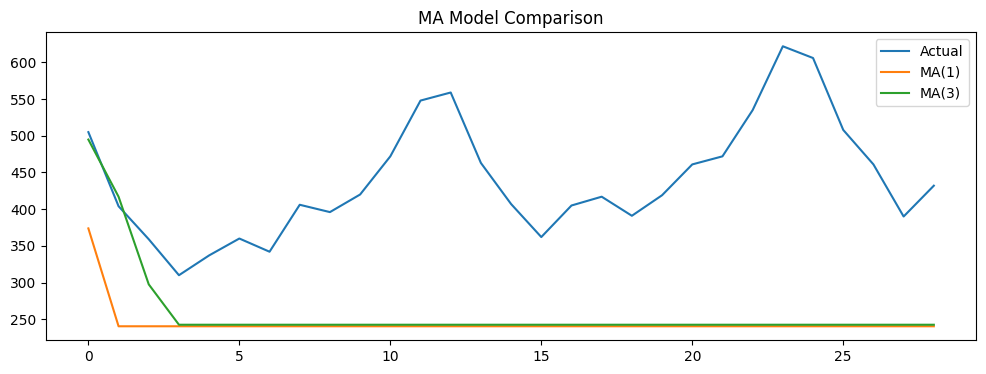

In [15]:
# ============================================================================
# LAB 8: MA MODEL
# ============================================================================

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# i. Plot ACF and PACF (already done in Lab 6)

# ii. Fit MA(1) model
ma1_model = ARIMA(train, order=(0, 0, 1)).fit()
ma1_pred = ma1_model.forecast(steps=len(test))
print(f"MA(1) AIC: {ma1_model.aic}")

# iii. Fit higher lag MA model
ma3_model = ARIMA(train, order=(0, 0, 3)).fit()
ma3_pred = ma3_model.forecast(steps=len(test))
print(f"MA(3) AIC: {ma3_model.aic}")

# iv. Compare performances
print("MA(1) Metrics:", calc_metrics(test, ma1_pred))
print("MA(3) Metrics:", calc_metrics(test, ma3_pred))

plt.figure(figsize=(12, 4))
plt.plot(test.values, label='Actual')
plt.plot(ma1_pred.values, label='MA(1)')
plt.plot(ma3_pred.values, label='MA(3)')
plt.legend()
plt.title('MA Model Comparison')
plt.show()